<h1 style='text-align:center'>Cryptocurrency EDA</h1>  
<br></br>

<p style='text-align:center'><b>Hello, Today I will try to analyze price movement of Crytocurrencies. </b></p>  

![cryptocurrency](https://cdn.wccftech.com/wp-content/uploads/2018/04/cryptocurrency-bezop-740x510.jpeg)  

<h3 style='text-align:center'>Now let's study our dataset. :D </h3>  



In [46]:
#Important Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
sns.set(style="whitegrid")
import missingno as msno
#Interactive
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML

In [3]:


HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
 $('div.cell.code_cell.rendered.selected div.input').hide();
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" class="btn btn-primary" value="Click here to toggle on/off the raw code."></form>''')



In [47]:
#Reading Data
data = pd.read_csv("all_currencies.csv").iloc[:,1:]
data.head(5)
print("\n Number of rows in our dataset = " + str(data.shape[0]))

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN



 Number of rows in our dataset = 645784


### <b>In our dataset we have the following features :- <b>
    * Date :- Date of record
    * Symbol :- Symbol of Cryptocurrency
    * Open :- Open Price of Symbol on record date
    * High :- High Price of Symbol on record date
    * Low :- Low Price of Symbol on record date
    * Close :- Close Price of Symbol on record date
    * Volume :- Volume of Symbol on record date
    * Market Cap

In [9]:
# Number of Symbols in our dataset
print("--- Symbols ---")
symbols_name=" , ".join(pd.unique(data['Symbol']).tolist())
print(symbols_name)
print("-------")
print("Number of symbols " + str(len(symbols_name)))

--- Symbols ---
$$$ , $PAC , 1337 , 2GIVE , 42 , 611 , 808 , 888 , 8BIT , ABJ , ABY , AC , ACC , ACES , ACN , ACOIN , ACP , ACT , ADA , ADC , ADCN , ADK , ADZ , AEON , AERM , AGLC , AIB , AKY , ALL , ALQO , AMBER , AMMO , AMS , ANC , ANI , ANTX , APC , ARB , ARC , ARCO , ARDR , ARG , ARGUS , ARI , ARK , ASAFE2 , ASN , ATB , ATC , ATMC , ATMOS , ATOM , ATX , AU , AUR , AV , AXIOM , B2X , BASH , BAT , BAY , BBP , BBR , BCA , BCC , BCD , BCF , BCH , BCI , BCN , BCO , BCX , BDL , BENJI , BERN , BEST , BET , BIGUP , BIO , BIOB , BIOS , BIP , BIRDS , BIS , BIT , BITB , BITG , BITOK , BITS , BITZ , BLAZR , BLC , BLITZ , BLK , BLOCK , BLU , BLZ , BNX , BOAT , BOLI , BOS , BOST , BPL , BRIA , BRIT , BRK , BRO , BRX , BSC , BSD , BSM , BSN , BSR , BSTAR , BSTY , BT2 , BTA , BTB , BTBc , BTC , BTCD , BTCP , BTCR , BTCS , BTCZ , BTDX , BTG , BTM , BTPL , BTQ , BTS , BTW , BTX , BUB , BUCKS , BUMBA , BUN , BURST , BUZZ , BWK , BXC , BXT , BYC , C2 , CAB , CACH , CALC , CANN , CARBON , CASH , CAT , 

### Variable Identification  

#### Type of Variable :- 

1) <b>Predictor</b> :- Open, High, Low, Volume and Market Cap  
2) <b>Target</b> :- Close

#### Data Types :- 

1) <b>Integer</b> :- Open, High, Low, Close, Volume and Market Cap  
2) <b>Character</b> :- Symbol



### Missing Values Study

In [14]:
# Checking Missing values in our dataset
print("By Numbers",data.isnull().sum(),"-------","By Percentage",100*data.isnull().sum()/data.shape[0],sep="\n\n")


By Numbers

Date              0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume         5756
Market Cap    84485
dtype: int64

-------

By Percentage

Date           0.000000
Symbol         0.000000
Open           0.000000
High           0.000000
Low            0.000000
Close          0.000000
Volume         0.891320
Market Cap    13.082548
dtype: float64


<b> In our dataset, 13% of rows are missing the market cap value. We will handle them in future according to our study</b>  

### Now we will compare different symbols on many parameters and output Top 10 symbols

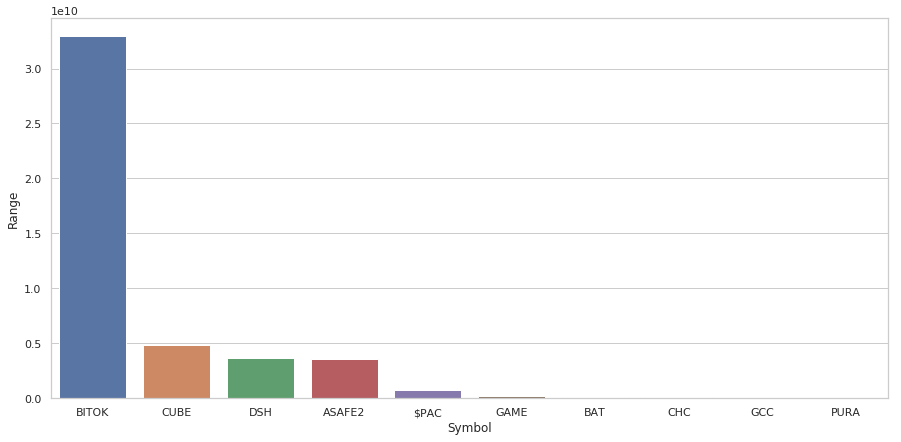

,Symbol,Range
87,BITOK,3.296800e+10
197,CUBE,4.857143e+09
241,DSH,3.700000e+09
45,ASAFE2,3.561520e+09
1,$PAC,7.410869e+08
316,GAME,2.299999e+08
59,BAT,9.224314e+07
161,CHC,7.599990e+07
323,GCC,6.329990e+07
591,PURA,5.849990e+07


In [12]:
# By Range (High - Low)
range_per = (100*(data.groupby('Symbol').max()['High'] - data.groupby('Symbol').min()['Low'])/data.groupby('Symbol').min()['Low']).reset_index() 
range_per.rename(columns={0:'Range'},inplace=True)
range_per.sort_values('Range',ascending=False,inplace=True)

#Barplot of top 10 symbols by Range
fig=plt.figure()
bar=sns.barplot(x=range_per.iloc[0:10,0],y=range_per.iloc[0:10,1])
plt.show()

range_per.head(10)


,Symbol,Volume
119,BTC,2.166609e+12
277,ETH,7.249645e+11
842,XRP,3.024932e+11
67,BCH,2.933503e+11
445,LTC,2.243070e+11
276,ETC,1.076702e+11
606,QTUM,8.074754e+10
505,NEO,5.559472e+10
18,ADA,5.340454e+10
204,DASH,4.151025e+10


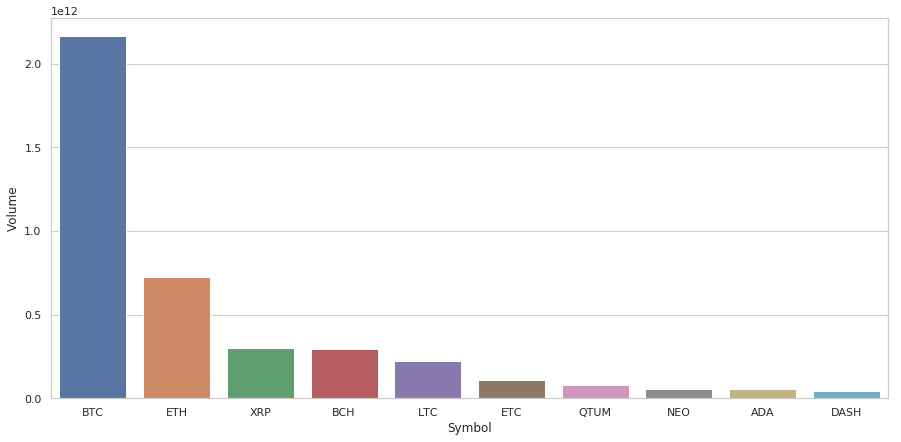

In [80]:
#By Volume
volume_ = data.groupby('Symbol').sum()['Volume'].reset_index().sort_values('Volume',ascending=False)
volume_.head(10)

#Barplot of top 10 symbols by Range
fig=plt.figure()
bar=sns.barplot(x=volume_.iloc[0:10,0],y=volume_.iloc[0:10,1])
plt.show()



<b> By Volume, Bitcoin (BTC), Ethereum(ETH) and Ripple(XRP) are the top 3 cryptocurrency. We will carry on our study by this 3 crytocurrencies. </b>  

## Bitcoin

In [48]:
#Bitcoin
bitcoin = data[data["Symbol"]=="BTC"]
print("Bitcoin data :-")
bitcoin.head(5)
print("\n\nMissing Data in Bitcoin Data\n")
print("  By Numbers",bitcoin.isnull().sum(),"-------","  By Percentage",100*bitcoin.isnull().sum()/bitcoin.shape[0],sep="\n\n")


Bitcoin data :-


,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
86586,2013-04-28,BTC,135.30,135.98,132.10,134.21,NaN,1.500520e+09
86587,2013-04-29,BTC,134.44,147.49,134.00,144.54,NaN,1.491160e+09
86588,2013-04-30,BTC,144.00,146.93,134.05,139.00,NaN,1.597780e+09
86589,2013-05-01,BTC,139.00,139.89,107.72,116.99,NaN,1.542820e+09
86590,2013-05-02,BTC,116.38,125.60,92.28,105.21,NaN,1.292190e+09




Missing Data in Bitcoin Data

  By Numbers

Date            0
Symbol          0
Open            0
High            0
Low             0
Close           0
Volume        243
Market Cap      0
dtype: int64

-------

  By Percentage

Date           0.000000
Symbol         0.000000
Open           0.000000
High           0.000000
Low            0.000000
Close          0.000000
Volume        13.050483
Market Cap     0.000000
dtype: float64


In [49]:
import mpl_finance
import matplotlib.dates as mdates

bitcoin['Date_n'] = pd.to_datetime(bitcoin['Date'])
bitcoin["Date_n"] = bitcoin["Date_n"].apply(mdates.date2num)

ohlc= bitcoin[['Date_n', 'Open', 'High', 'Low','Close']].copy()



Candlestick Chart of Bitcoin Dataset


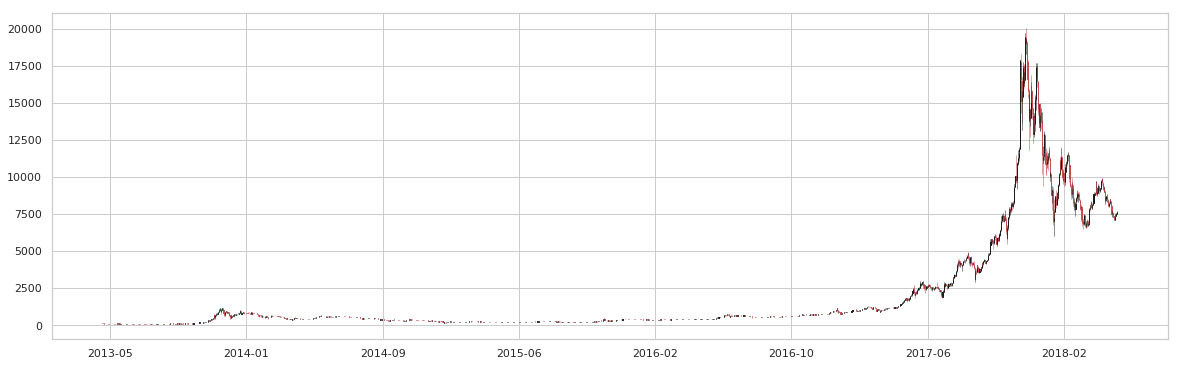


Candlestick Chart of Bitcoin Dataset for last 100 days


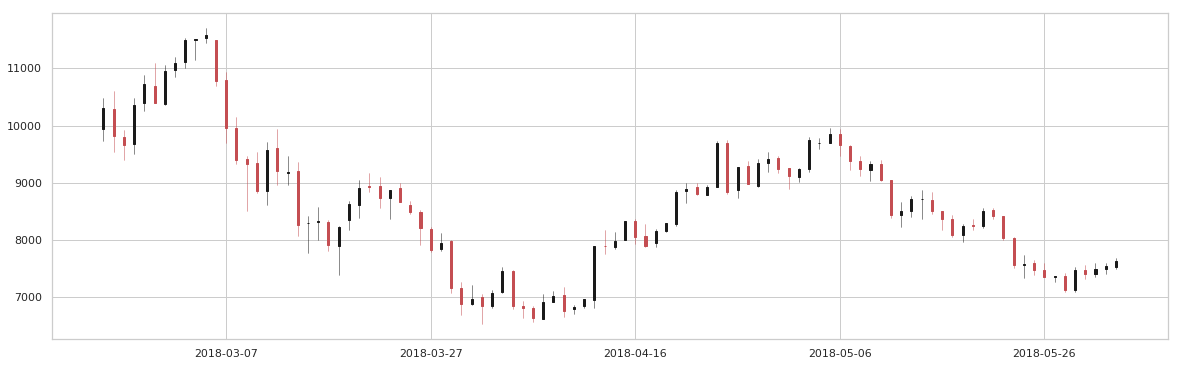

In [37]:
print("Candlestick Chart of Bitcoin Dataset")
figure,ax=plt.subplots(figsize=(20,6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
candle=mpl_finance.candlestick_ohlc(ax,ohlc.values)
plt.show()

print("\nCandlestick Chart of Bitcoin Dataset for last 100 days")
figure,ax=plt.subplots(figsize=(20,6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
candle=mpl_finance.candlestick_ohlc(ax,ohlc.tail(100).values)
plt.show()

Visualizing Volume of Bitcoin for past 100 days


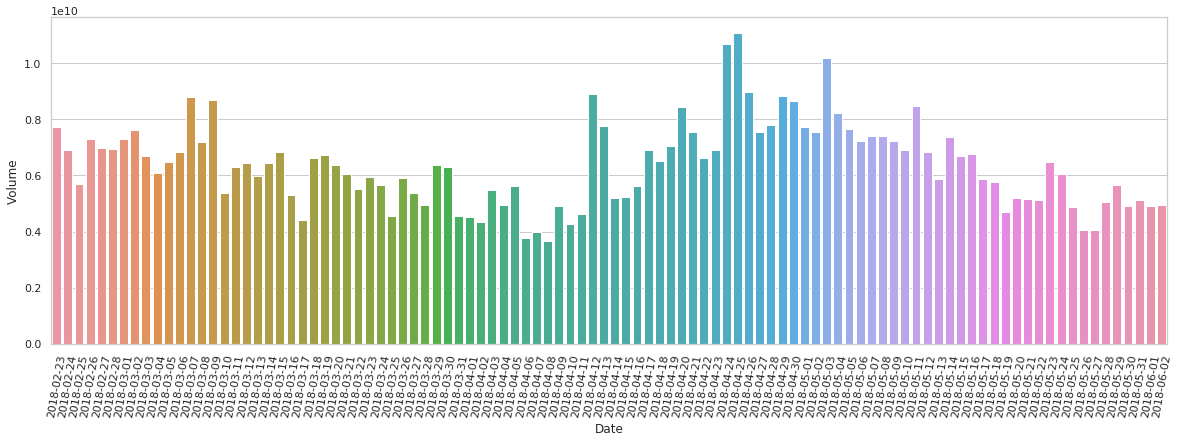

In [50]:
print("Visualizing Volume of Bitcoin for past 100 days")
figure,ax=plt.subplots(figsize=(20,6))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
vol_bar=sns.barplot(x=bitcoin.tail(100).Date,y=bitcoin.tail(100).Volume)
rot=plt.xticks(rotation=80)
plt.show(figure)

Now we'll use 5 day high/low/close average to study last 50 days of Bitcoin.  
5 day high and low works usually as a good stretch point. Let's implement this.


,Date,Symbol,Open,High,Low,Close,Volume,Market Cap,Date_n,5-day-high,5-day-low,5-day-close
88438,2018-05-24,BTC,7561.12,7738.60,7331.14,7587.34,6.049220e+09,1.289250e+11,736838.0,8267.288,7882.792,8023.836
88439,2018-05-25,BTC,7592.30,7659.14,7392.65,7480.14,4.867830e+09,1.294700e+11,736839.0,8086.634,7720.274,7817.214
88440,2018-05-26,BTC,7486.48,7595.16,7349.12,7355.88,4.051540e+09,1.276820e+11,736840.0,7894.162,7517.074,7604.592
88441,2018-05-27,BTC,7362.08,7381.74,7270.96,7368.22,4.056520e+09,1.255750e+11,736841.0,7685.860,7370.350,7469.880
88442,2018-05-28,BTC,7371.31,7419.05,7100.89,7135.99,5.040600e+09,1.257480e+11,736842.0,7558.738,7288.952,7385.514
88443,2018-05-29,BTC,7129.46,7526.42,7090.68,7472.59,5.662660e+09,1.216360e+11,736843.0,7516.302,7240.860,7362.564
88444,2018-05-30,BTC,7469.73,7573.77,7313.60,7406.52,4.922540e+09,1.274540e+11,736844.0,7499.228,7225.050,7347.840
88445,2018-05-31,BTC,7406.15,7608.90,7361.13,7494.17,5.127130e+09,1.263860e+11,736845.0,7501.976,7227.452,7375.498
88446,2018-06-01,BTC,7500.70,7604.73,7407.34,7541.45,4.921460e+09,1.280140e+11,736846.0,7546.574,7254.728,7410.144
88447,2018-06-02,BTC,7536.72,7695.83,7497.26,7643.45,4.939300e+09,1.286450e+11,736847.0,7601.930,7334.002,7511.636


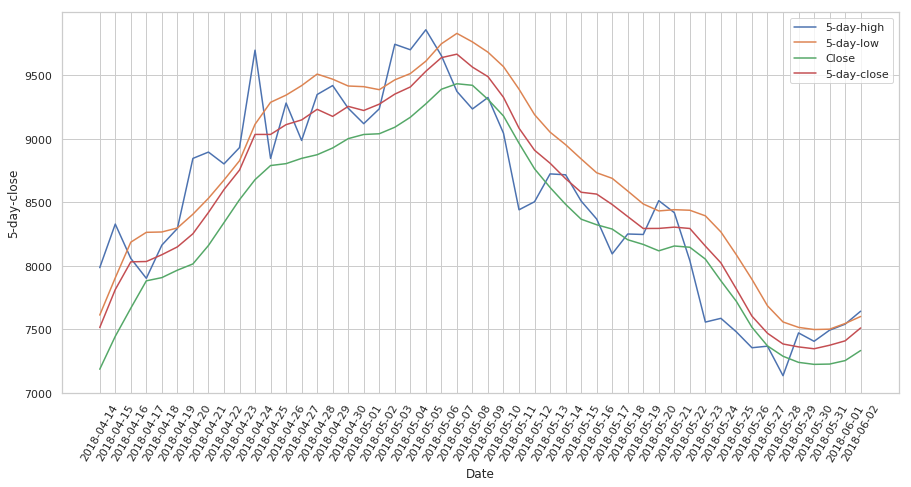

In [66]:
bitcoin['5-day-high']=bitcoin.High.rolling(5).mean()
bitcoin['5-day-low']=bitcoin.Low.rolling(5).mean()
bitcoin['5-day-close']=bitcoin.Close.rolling(5).mean()
bitcoin.tail(10)

bt100=bitcoin.tail(50)
figure,ax=plt.subplots()
rot=plt.xticks(rotation=60)
c=sns.lineplot(x=bt100.Date,y=bt100.Close)
h=sns.lineplot(x=bt100.Date,y=bt100['5-day-high'])
l=sns.lineplot(x=bt100.Date,y=bt100['5-day-low'])
c5=sns.lineplot(x=bt100.Date,y=bt100['5-day-close'])
leg=plt.legend({"Close":"Close","5-day-high":"5-day-high","5-day-low":"5-day-low","5-day-close":"5-day-close"})
plt.show()

<b> Let's see the count of all 121/13 MA crossovers and see if it was again the win of Bulls </b>

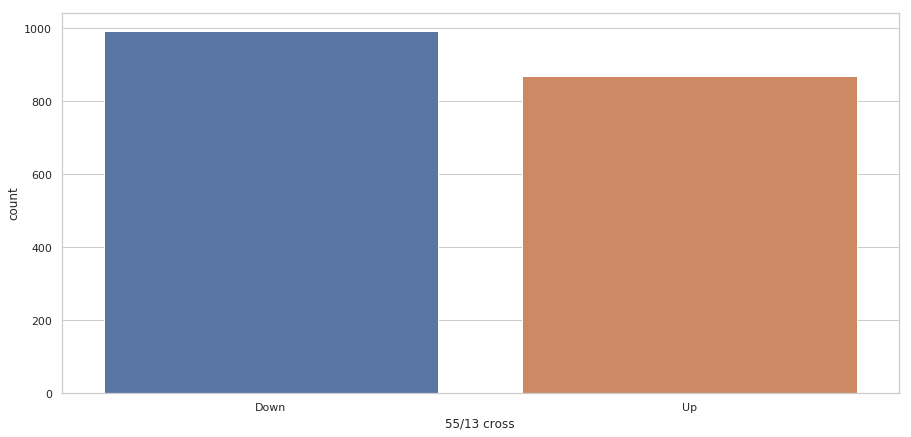

In [79]:
bitcoin['55-day-close']=bitcoin.High.rolling(55).mean()
bitcoin['13-day-close']=bitcoin.Low.rolling(13).mean()
bitcoin["55/13 cross"]="Down"
bitcoin["55/13 cross"][bitcoin['13-day-close']>bitcoin['55-day-close']]="Up"
cp=sns.countplot(bitcoin["55/13 cross"])
plt.show()

<b> It looks strange as we have seen that for the most part the trend was bullish. But it isn't strange. In the beginning the trend was straight bullish;no cross-overs, but when the trend was changed recently; there are much cross-overs and noise which lead high count of down cross-overs. </b>

## Correlation / Pair-Trade  

Let's do 1 thing. We'll take top 3 volume cryto and check their correlation for past 100 days and see if there's some pair trade opportunity.

In [98]:
sym=volume_.head(3)["Symbol"].tolist()
print("  ".join(sym))

ethereum=data[data["Symbol"]=="ETH"].tail(100)
ripple=data[data["Symbol"]=="XRP"].tail(100)
bitcoin=data[data["Symbol"]=="BTC"].tail(100)

ethereum.tail()
ripple.tail()
bitcoin.tail()

BTC  ETH  XRP


,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
208000,2018-05-29,ETH,516.15,572.26,516.15,565.39,2.330820e+09,5.147440e+10
208001,2018-05-30,ETH,566.83,583.14,545.43,559.59,2.053970e+09,5.654050e+10
208002,2018-05-31,ETH,558.50,585.54,557.07,577.64,1.985040e+09,5.572080e+10
208003,2018-06-01,ETH,578.67,589.09,567.66,580.04,1.945890e+09,5.774570e+10
208004,2018-06-02,ETH,580.43,597.08,577.32,591.81,1.880390e+09,5.793290e+10


,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
624454,2018-05-29,XRP,0.556084,0.610749,0.551635,0.601241,380744000.0,2.179290e+10
624455,2018-05-30,XRP,0.603769,0.627679,0.590058,0.605817,320605000.0,2.366170e+10
624456,2018-05-31,XRP,0.603452,0.621636,0.596089,0.612622,283328000.0,2.364930e+10
624457,2018-06-01,XRP,0.612893,0.624824,0.609069,0.623364,263088000.0,2.401920e+10
624458,2018-06-02,XRP,0.623462,0.648982,0.619477,0.643451,315206000.0,2.446560e+10


,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
88443,2018-05-29,BTC,7129.46,7526.42,7090.68,7472.59,5.662660e+09,1.216360e+11
88444,2018-05-30,BTC,7469.73,7573.77,7313.60,7406.52,4.922540e+09,1.274540e+11
88445,2018-05-31,BTC,7406.15,7608.90,7361.13,7494.17,5.127130e+09,1.263860e+11
88446,2018-06-01,BTC,7500.70,7604.73,7407.34,7541.45,4.921460e+09,1.280140e+11
88447,2018-06-02,BTC,7536.72,7695.83,7497.26,7643.45,4.939300e+09,1.286450e+11


In [103]:
corr_df=pd.DataFrame()
corr_df['Date']=bitcoin.Date.tolist()
corr_df['XRP']=ripple.Close.tolist()
corr_df['ETH']=ethereum.Close.tolist()
corr_df['BTC']=bitcoin.Close.tolist()


corr_df.corr()

,XRP,ETH,BTC
XRP,1.000000,0.893428,0.930650
ETH,0.893428,1.000000,0.889832
BTC,0.930650,0.889832,1.000000


#### Waoh!!! Such high correlations.. Thats some high hope !! We can do so work on this to setup some strategy on this symbols.

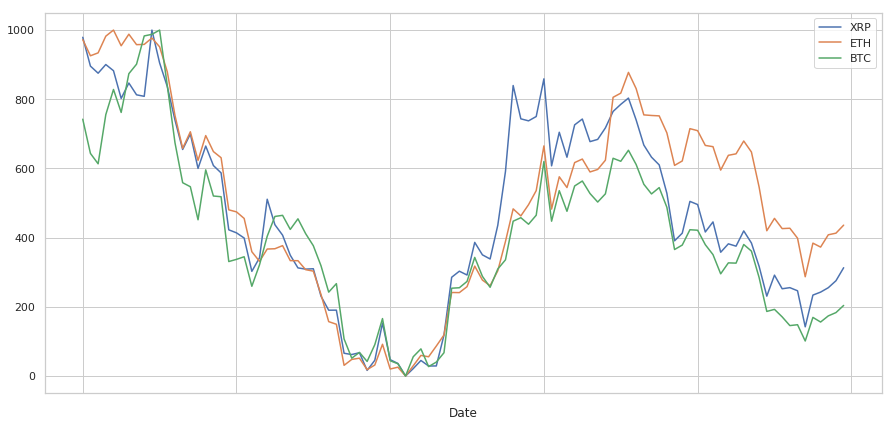

In [111]:
#scaling all sym prices to 1000 range to plot properly
corr_df['XRP']=(corr_df['XRP']-corr_df['XRP'].min())/(corr_df['XRP'].max()-corr_df['XRP'].min())*1000
corr_df['ETH']=(corr_df['ETH']-corr_df['ETH'].min())/(corr_df['ETH'].max()-corr_df['ETH'].min())*1000
corr_df['BTC']=(corr_df['BTC']-corr_df['BTC'].min())/(corr_df['BTC'].max()-corr_df['BTC'].min())*1000

line_p=corr_df.plot(kind="line",x="Date")

### Three Muskeeters :D

<center> <h3> That's all for now. Do give your feedbacks :) </h3> </center>
<center> <h1> Thank You </h1> </center>
